In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from scipy.optimize import minimize
from functools import partial
from matplotlib.pyplot import figure

In [ ]:
mu01 = (5, 0)
sigma01 = [[4, 0],[0, 2]]
mu02 = (0, 4)
sigma02 = [[1, 0],[0, 3]]
mu1= (3, 2)
sigma1 = [[2, 0],[0, 2]]

In [ ]:
def generateData():
  data=[]
  #generate d100
  datatrain100=[]
  for i in range (100):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.6):
      disttochoose = np.random.uniform()
      if(disttochoose <= 0.5):
        value = np.random.multivariate_normal(mu01,sigma01,1)
        ele=[]
        ele.append(value[0][0])
        ele.append(value[0][1])
        ele.append(0)
        datatrain100.append(ele)
      else:
        value = np.random.multivariate_normal(mu02,sigma02,1)
        ele=[]
        ele.append(value[0][0])
        ele.append(value[0][1])
        ele.append(0)
        datatrain100.append(ele)
    else:
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(1)
      datatrain100.append(ele)
  df = pd.DataFrame(datatrain100, columns = ['x', 'y', 'label'])
  print(df.head())
  print(df.shape)


  #generate d1000
  datatrain1000=[]
  for i in range (1000):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.60):
      disttochoose = np.random.uniform()
      if(disttochoose <= 0.5):
        value = np.random.multivariate_normal(mu01,sigma01,1)
        ele=[]
        ele.append(value[0][0])
        ele.append(value[0][1])
        ele.append(0)
        datatrain1000.append(ele)
      else:
        value = np.random.multivariate_normal(mu02,sigma02,1)
        ele=[]
        ele.append(value[0][0])
        ele.append(value[0][1])
        ele.append(0)
        datatrain1000.append(ele)
    else:
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(1)
      datatrain1000.append(ele)
  df1k = pd.DataFrame(datatrain1000, columns = ['x', 'y', 'label'])
  print(df1k.head())
  print(df1k.shape)

  # generate d10000
  datatrain10000=[]
  for i in range (10000):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.60):
      disttochoose = np.random.uniform()
      if(disttochoose <= 0.5):
        value = np.random.multivariate_normal(mu01,sigma01,1)
        ele=[]
        ele.append(value[0][0])
        ele.append(value[0][1])
        ele.append(0)
        datatrain10000.append(ele)
      else:
        value = np.random.multivariate_normal(mu02,sigma02,1)
        ele=[]
        ele.append(value[0][0])
        ele.append(value[0][1])
        ele.append(0)
        datatrain10000.append(ele)
    else:
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(1)
      datatrain10000.append(ele)
  df10k = pd.DataFrame(datatrain10000, columns = ['x', 'y', 'label'])
  print(df10k.head())
  print(df10k.shape)

  # generate d20000
  datavalid20000=[]
  for i in range (20000):
    labeltogenerate = np.random.uniform()
    if(labeltogenerate <= 0.60):
      disttochoose = np.random.uniform()
      if(disttochoose <= 0.5):
        value = np.random.multivariate_normal(mu01,sigma01,1)
        ele=[]
        ele.append(value[0][0])
        ele.append(value[0][1])
        ele.append(0)
        datavalid20000.append(ele)
      else:
        value = np.random.multivariate_normal(mu02,sigma02,1)
        ele=[]
        ele.append(value[0][0])
        ele.append(value[0][1])
        ele.append(0)
        datavalid20000.append(ele)
    else:
      value = np.random.multivariate_normal(mu1,sigma1,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(1)
      datavalid20000.append(ele)
  df20k = pd.DataFrame(datavalid20000, columns = ['x', 'y', 'label'])
  print(df20k.head())
  print(df20k.shape)
  data.append(df)
  data.append(df1k)
  data.append(df10k)
  data.append(df20k)
  print(len(data))
  return data

In [ ]:
data = generateData()

          x         y  label
0  0.104368  0.501570      1
1  3.220527  1.787113      1
2  3.172129  3.073291      1
3  5.327284  1.825023      0
4  2.260250 -1.106370      0
(100, 3)
          x         y  label
0  5.948369  1.394400      0
1  3.392854  0.459216      0
2 -0.236295  3.348265      0
3  0.690310 -0.599717      0
4  4.364659  2.010713      1
(1000, 3)
          x         y  label
0 -0.056612  4.507375      0
1  2.239950 -0.349316      0
2 -0.630277  2.412561      0
3  2.870037 -0.189116      0
4  3.511102  1.013000      1
(10000, 3)
          x         y  label
0  2.501505 -0.981753      0
1  5.738718  1.774964      1
2  3.594697  2.647376      1
3  3.743538  3.023832      1
4  6.254526  1.901715      1
(20000, 3)
4


In [ ]:
#plot data
def plotData(dfToPlot):
  x0 = [i for i in range(dfToPlot.shape[0]) if (dfToPlot.label[i] == 0)]
  x1 = [i for i in range(dfToPlot.shape[0]) if (dfToPlot.label[i] == 1 )]
  figure(figsize=(8, 6), dpi=80)
  plt.plot(dfToPlot.x[x0],dfToPlot.y[x0],'+',color ='red')
  plt.plot(dfToPlot.x[x1],dfToPlot.y[x1],'.',color = 'blue')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title("Actual Data distribution")
  plt.legend(['Class 0','Class 1'])
  plt.show()

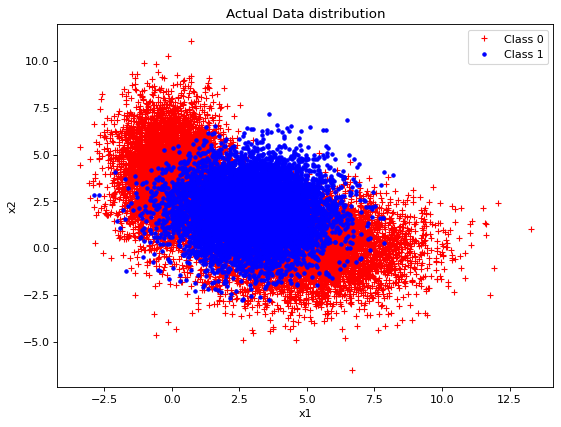

In [ ]:
plotData(data[3])

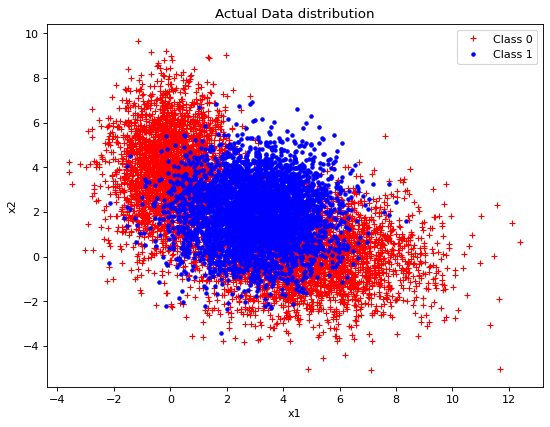

In [ ]:
plotData(data[2])

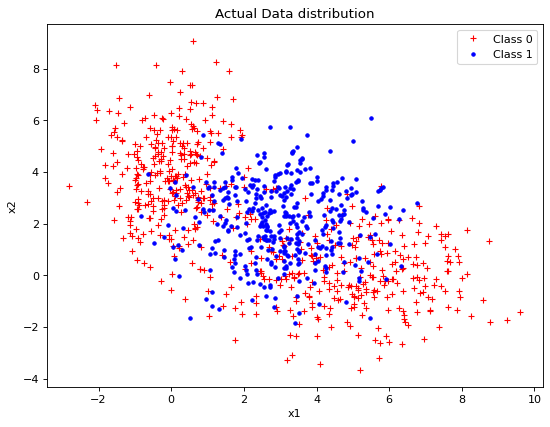

In [ ]:
plotData(data[1])

In [ ]:
data[3].label.value_counts(ascending=True)

1     8058
0    11942
Name: label, dtype: int64

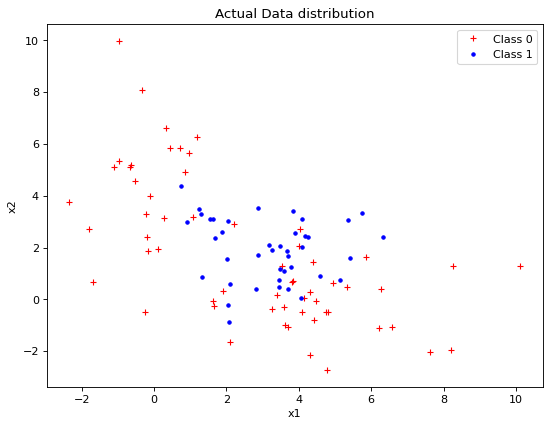

In [ ]:
plotData(data[0])

In [79]:
def plotROC(df):
  n1 = df.label.value_counts(ascending=True).iloc[0]
  n0 = df.label.value_counts(ascending=True).iloc[1]
  dataonly = df.drop(['label'], axis =1)
  X = dataonly.to_numpy()
  label1 = multivariate_normal.pdf(X, mu1, sigma1)
  label0 = 0.5*multivariate_normal.pdf(X, mu01, sigma01) + 0.5*multivariate_normal.pdf(X, mu02, sigma02)
  ratio = np.log(label1)- np.log(label0)
  thresholdValues = sorted(ratio)
  label = df.label.to_numpy()

  tpr=[]
  fpr=[]
  errorList=[]
  errorListAliter=[]
  minEmpiricalThreshold = 0
  minEmpiricalError = 1
  for value in thresholdValues:
    tp=0
    fp=0
    tn=0
    fn=0
    decisions = (ratio>value).astype(int)
    assert (len(decisions) == (n0+n1))
    for i in range(len(ratio)):
      if(label[i]==1 and decisions[i] == 1):
        tp+=1
      if(label[i]==0 and decisions[i] == 1):
        fp+=1
      if(label[i]==1 and decisions[i] == 0):
        fn+=1
      if(label[i]==0 and decisions[i] == 0):
        tn+=1
    error = 1-((tp+tn)/(n0+n1))
    errorAliter = (fp+fn)/(n0+n1)
    if(error < minEmpiricalError):
      minEmpiricalError = error
      minEmpiricalThreshold = value
    errorList.append(error)
    errorListAliter.append(errorAliter)
    tpr.append(tp/(n1))
    fpr.append(fp/(n0))
    assert (tp+fp+tn+fn == (n0+n1))
  # at theoretical threshold for min error classifier
  theoreticalThreshold = np.log(1.5)
  tpt=0
  fpt=0
  fnt=0
  tnt=0
  c1=[]
  ic1=[]
  c0=[]
  ic0=[]
  decisiontheoreticalThreshold = (ratio>theoreticalThreshold).astype(int)
  for i in range(len(ratio)):
    if(label[i]==1 and decisiontheoreticalThreshold[i] == 1):
        tpt+=1
        c1.append(i)
    if(label[i]==0 and decisiontheoreticalThreshold[i] == 1):
      fpt+=1
      ic0.append(i)
    if(label[i]==1 and decisiontheoreticalThreshold[i] == 0):
      fnt+=1
      ic1.append(i)
    if(label[i]==0 and decisiontheoreticalThreshold[i] == 0):
        tnt+=1
        c0.append(i)
  fprt = fpt/(n0)
  tprt = tpt/(n1)
  theoreticalMinError = 1-((tnt+tpt)/(n0+n1))
  assert (tpt+fpt+fnt+tnt==(n0+n1))

  #plot ROC curve for all thresholds and mark operatring point of min error
  figure(figsize=(10, 8), dpi=80)
  tprarray = np.array(tpr)
  fprarray = np.array(fpr)
  plt.plot(fpr[np.argmin(errorList)],tpr[np.argmin(errorList)],'+',color = 'red', markersize = 20)
  plt.plot(fprt,tprt,'*',color = 'black', markersize = 20)
  plt.plot(fpr,tpr)
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title('ROC')
  plt.legend(['Empirical Min. error','Theoretical Min. error', 'ROC curve'])
  plt.show()
  #plot threshold vs error
  figure(figsize=(10, 8), dpi=80)
  plt.plot(thresholdValues,errorList)
  plt.xlabel('thresholdvalues')
  plt.ylabel('error')
  plt.title('error vs threshold')
  plt.show()
  # print error values
  logEmpThreshold = thresholdValues[np.argmin(errorList)]
  empMinError = min(errorList)
  empMinErrorAliter = min(errorListAliter)
  empThreshold = np.exp(thresholdValues[np.argmin(errorList)])
  print("error for theoretical threshold: {}".format(theoreticalMinError))
  print("log empirical threshold value for minnimum error: {}".format(logEmpThreshold))
  print("empirical minumum error: {}".format(empMinError))
  print("empirical min error aliter: {}" .format(empMinErrorAliter))
  print("threshold value with min error {}".format(np.exp(empThreshold)))
  #plot classification with decision boundary
  figure(figsize=(10, 8), dpi=80)
  plt.plot(df.x[c1],df.y[c1],'+',color='g',markersize = 10)
  plt.plot(df.x[ic1],df.y[ic1],'+',color='r',markersize = 10)
  plt.plot(df.x[c0],df.y[c0],'.',color='g',markersize = 10)
  plt.plot(df.x[ic0],df.y[ic0],'.',color='r',markersize = 10)
  horizontalGrid = np.linspace(np.floor(min(X[:,0])),np.ceil(max(X[:,0])),100)
  verticalGrid = np.linspace(np.floor(min(X[:,1])),np.ceil(max(X[:,1])),100);
  dsg = np.zeros((100,100))
  a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
  for i in range(100):
    for j in range(100):
      p = multivariate_normal.pdf(np.array([a[0][i][j],a[1][i][j]]), mu1, sigma1)
      q = 0.5*multivariate_normal.pdf(np.array([a[0][i][j],a[1][i][j]]), mu01, sigma01) + 0.5*multivariate_normal.pdf(np.array([a[0][i][j],a[1][i][j]]), mu02, sigma02)
      dsg[i][j] = np.log(p) - np.log(q) - np.log(1.5)
  plt.contour(a[0],a[1],dsg)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Classifier Output & Decison Boundary')
  plt.legend(['Label 1 correctly Classified','Label 1 incorrectly classified', 'Label 0 correctly classified','Label 0 incorrectly classified'])
  plt.show()
  


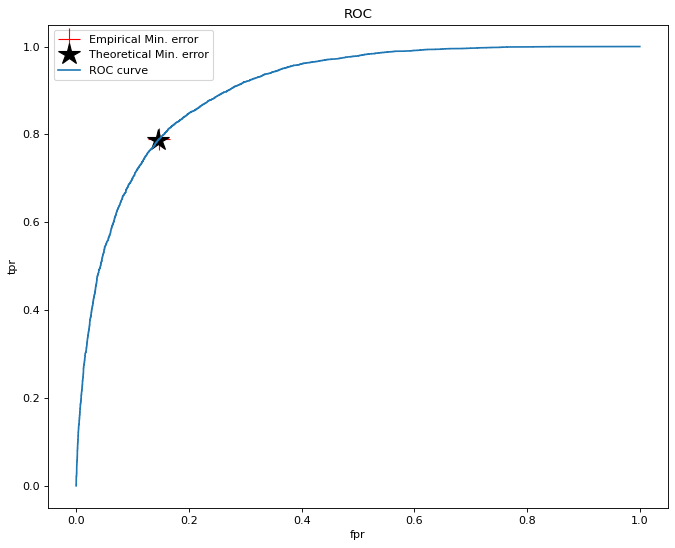

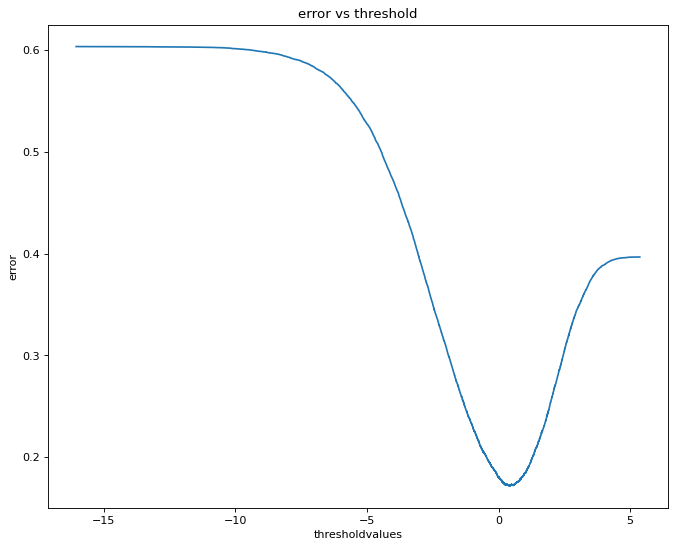

error for theoretical threshold: 0.17254999999999998
log empirical threshold value for minnimum error: 0.39505170935215883
empirical minumum error: 0.17200000000000004
empirical min error aliter: 0.172
threshold value with min error 4.41258616457119


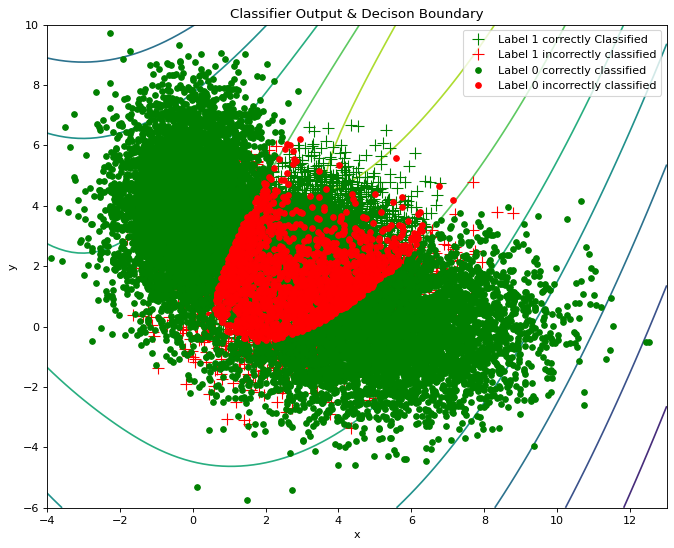

In [80]:
plotROC(data[3])

In [ ]:
dfTrain=data[3]
#df=data[3]
df0=dfTrain.loc[dfTrain['label']==0]
df1 = dfTrain.loc[dfTrain['label']==1]
df0=df0.drop(columns=['label'])
df1=df1.drop(columns=['label'])
cov1 = np.cov(df1.to_numpy(),rowvar=False)
mean1 = dfTrain.groupby("label").mean().iloc[1].to_numpy()
gm0 = GaussianMixture(n_components=2,n_init=20,init_params='random',max_iter=1000000).fit(df0.to_numpy())
w01=gm0.weights_[0]
w02 = gm0.weights_[1]
mu01 = gm0.means_[0]
mu02 = gm0.means_[1]
cov01 = gm0.covariances_[0]
cov02 = gm0.covariances_[1]
#gm1 = GaussianMixture(n_components=1,n_init=20,means_init=[[3,2]],max_iter=10000000,tol=1e-10,precisions_init=[[0.5 0][0.5 0]]).fit(df1.to_numpy())
#mean1 = gm1.means_[0]
#cov1 = gm1.covariances_[0]
print("weight 01 is {}".format(w01))
print("weight 02 is {}".format(w02))
print("means of label 0 0: {} 1: {}".format(mu01,mu02))
print("covariances of label 0  0:{} 1:{}".format(cov01,cov02))
print("label 1 mean {}".format(mean1))
print("label 1 covariance {}".format(cov1))

weight 01 is 0.4988037455457243
weight 02 is 0.5011962544542756
means of label 0 0: [2.56243781 1.970412  ] 1: [2.46027171 2.00707296]
covariances of label 0  0:[[ 8.94506549 -5.04958758]
 [-5.04958758  6.38658837]] 1:[[ 8.65415835 -5.01457585]
 [-5.01457585  6.53738255]]
label 1 mean [2.98867402 2.00011838]
label 1 covariance [[1.98368885 0.02070089]
 [0.02070089 1.95050673]]


In [ ]:
df=data[2]
df0 =  df.loc[df['label']==0]
print(df0.shape)
df0=df0.drop(columns=['label'])
print(df0.to_numpy().shape)
#X=df0.to_numpy().astype('float')
gm0 = GaussianMixture(n_components=2,random_state=0).fit(df0.to_numpy())
w01=gm0.weights_[0]
w02 = gm0.weights_[1]
mu01 = gm0.means_[0]
mu02 = gm0.means_[1]
cov01 = gm0.covariances_[0]
cov02 = gm0.covariances_[1]
print(w01)
print(w02)
print(mu01)
print(mu02)
print(cov01)
print(cov02)

(6024, 3)
(6024, 2)
0.48906490170989014
0.5109350982901099
[ 5.00895442 -0.01849169]
[0.01240122 3.91542557]
[[4.00105534 0.02632796]
 [0.02632796 2.00901823]]
[[1.03013013 0.0069155 ]
 [0.0069155  3.12522666]]


In [81]:
# Part B

#sample means and covariances
def estimateParametersAndPlotROC(dfTrain, df):
  df0 =  dfTrain.loc[dfTrain['label']==0]
  df1 = dfTrain.loc[dfTrain['label']==1]
  df0=df0.drop(columns=['label'])
  df1=df1.drop(columns=['label'])
  cov1 = np.cov(df1.to_numpy(),rowvar=False)
  mean1 = df.groupby("label").mean().iloc[1].to_numpy()
  gm0 = GaussianMixture(n_components=2,random_state=0).fit(df0.to_numpy())
  w01=gm0.weights_[0]
  w02 = gm0.weights_[1]
  mu01 = gm0.means_[0]
  mu02 = gm0.means_[1]
  cov01 = gm0.covariances_[0]
  cov02 = gm0.covariances_[1]
  gm1 = GaussianMixture(n_components=1,random_state=0).fit(df1.to_numpy())
  mean1 = gm1.means_[0]
  cov1 = gm1.covariances_[0]
  n1 = df.label.value_counts(ascending=True).iloc[0]
  n0 = df.label.value_counts(ascending=True).iloc[1]
  nt1 = dfTrain.label.value_counts(ascending=True).iloc[0]
  nt0 = dfTrain.label.value_counts(ascending=True).iloc[1]
  dataonly = df.drop(['label'], axis =1)
  X = dataonly.to_numpy()
  label1 = multivariate_normal.pdf(X, mean1, cov1)
  label0 = w01*multivariate_normal.pdf(X, mu01, cov01) + w02*multivariate_normal.pdf(X, mu02, cov02)
  ratio = np.log(label1)- np.log(label0)
  thresholdValues = sorted(ratio)
  label = df.label.to_numpy()

  tpr=[]
  fpr=[]
  errorList=[]
  errorListAliter=[]
  minEmpiricalThreshold = 0
  minEmpiricalError = 1
  for value in thresholdValues:
    tp=0
    fp=0
    tn=0
    fn=0
    decisions = (ratio>=value).astype(int)
    assert (len(decisions) == (n0+n1))
    for i in range(len(ratio)):
      if(label[i]==1 and decisions[i] == 1):
        tp+=1
      if(label[i]==0 and decisions[i] == 1):
        fp+=1
      if(label[i]==1 and decisions[i] == 0):
        fn+=1
      if(label[i]==0 and decisions[i] == 0):
        tn+=1
    error = 1-((tp+tn)/(n0+n1))
    errorAliter = (fp+fn)/(n0+n1)
    if(error < minEmpiricalError):
      minEmpiricalError = error
      minEmpiricalThreshold = value
    errorList.append(error)
    errorListAliter.append(errorAliter)
    tpr.append(tp/(n1))
    fpr.append(fp/(n0))
    assert (tp+fp+tn+fn == (n0+n1))
  # at theoretical threshold for min error classifier
  theoreticalThreshold = np.log(1.5)
  tpt=0
  fpt=0
  fnt=0
  tnt=0
  c1=[]
  ic1=[]
  c0=[]
  ic0=[]
  decisiontheoreticalThreshold = (ratio>=theoreticalThreshold).astype(int)
  for i in range(len(ratio)):
    if(label[i]==1 and decisiontheoreticalThreshold[i] == 1):
      tpt+=1
      c1.append(i)
    if(label[i]==0 and decisiontheoreticalThreshold[i] == 1):
      fpt+=1
      ic0.append(i)
    if(label[i]==1 and decisiontheoreticalThreshold[i] == 0):
      fnt+=1
      ic1.append(i)
    if(label[i]==0 and decisiontheoreticalThreshold[i] == 0):
      tnt+=1
      c0.append(i)
  fprt = fpt/(n0)
  tprt = tpt/(n1)
  theoreticalMinError = 1-((tnt+tpt)/(n0+n1))
  assert (tpt+fpt+fnt+tnt==(n0+n1))

  #plot ROC curve for all thresholds and mark operatring point of min error
  figure(figsize=(10, 8), dpi=80)
  tprarray = np.array(tpr)
  fprarray = np.array(fpr)
  plt.plot(fpr[np.argmin(errorList)],tpr[np.argmin(errorList)],'+',color = 'red', markersize = 20)
  plt.plot(fprt,tprt,'*',color = 'black', markersize = 20)
  plt.plot(fpr,tpr)
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title('ROC')
  plt.legend(['Empirical Min. error','Theoretical Min. error', 'ROC curve'])
  plt.show()
  #plot threshold vs error
  figure(figsize=(10, 8), dpi=80)
  plt.plot(thresholdValues,errorList)
  plt.xlabel('thresholdvalues')
  plt.ylabel('error')
  plt.title('error vs threshold')
  plt.show()
  #plot classification with decision boundary
  figure(figsize=(10, 8), dpi=80)
  plt.plot(df.x[c1],df.y[c1],'+',color='g',markersize = 10)
  plt.plot(df.x[ic1],df.y[ic1],'+',color='r',markersize = 10)
  plt.plot(df.x[c0],df.y[c0],'.',color='g',markersize = 10)
  plt.plot(df.x[ic0],df.y[ic0],'.',color='r',markersize = 10)
  horizontalGrid = np.linspace(np.floor(min(X[:,0])),np.ceil(max(X[:,0])),100)
  verticalGrid = np.linspace(np.floor(min(X[:,1])),np.ceil(max(X[:,1])),100);
  dsg = np.zeros((100,100))
  a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
  for i in range(100):
    for j in range(100):
      p = multivariate_normal.pdf(np.array([a[0][i][j],a[1][i][j]]), mu1, sigma1)
      q = 0.5*multivariate_normal.pdf(np.array([a[0][i][j],a[1][i][j]]), mu01, sigma01) + 0.5*multivariate_normal.pdf(np.array([a[0][i][j],a[1][i][j]]), mu02, sigma02)
      dsg[i][j] = np.log(p) - np.log(q) - np.log(1.5)
  plt.contour(a[0],a[1],dsg,level=[0])
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Classifier Output & Decison Boundary')
  plt.legend(['Label 1 correctly Classified','Label 1 incorrectly classified', 'Label 0 correctly classified','Label 0 incorrectly classified'])
  plt.show()
  # print error values
  logEmpThreshold = thresholdValues[np.argmin(errorList)]
  empMinError = min(errorList)
  empMinErrorAliter = min(errorListAliter)
  empThreshold = np.exp(thresholdValues[np.argmin(errorList)])
  print("GMM mean for component 1 of class 0 : {}".format(mu01))
  print("GMM covariance for component 1 of class 0: {}".format(cov01))
  print("GMM mean for component 1 of class 0 : {}".format(mu02))
  print("GMM covariance for component 2 of class 0: {}".format(cov02))
  print("GMM prior for class 0 component 1 {} component 2 {}".format(w01,w02))
  print("GMM mean for class 1 {}".format(mean1))
  print("GMM covariance for class 1 {}".format(cov1))
  print("min error for theoretical threshold: {}".format(theoreticalMinError))
  print("log empirical threshold value for minnimum error: {}".format(logEmpThreshold))
  print("empirical minumum error: {}".format(empMinError))
  print("empirical min error aliter: {}" .format(empMinErrorAliter))
  print("threshold value with min error {}".format(np.exp(empThreshold)))


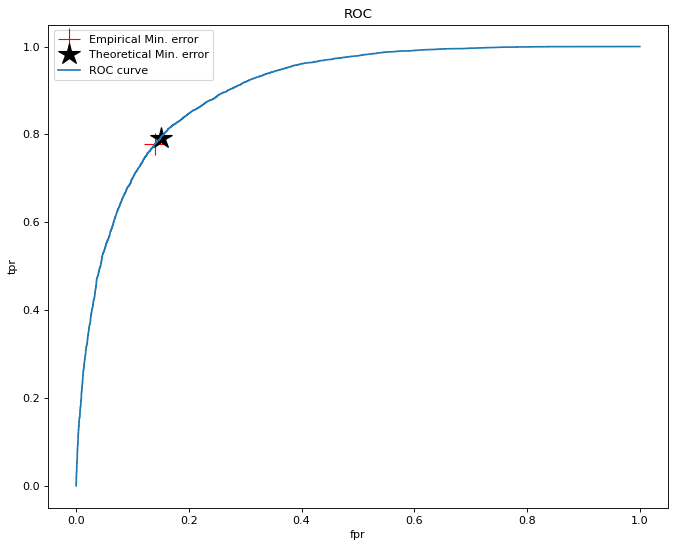

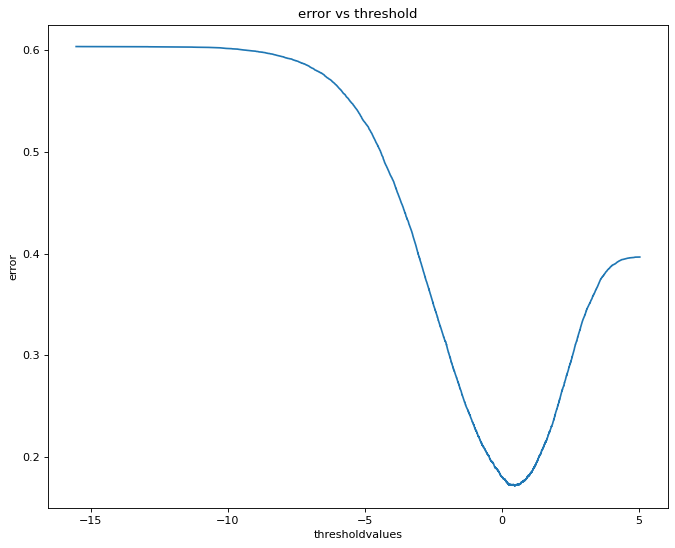

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: UserWarning: The following kwargs were not used by contour: 'level'


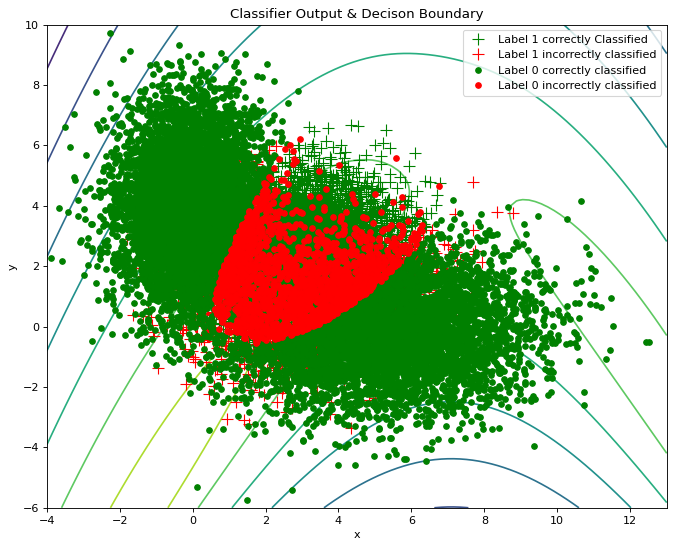

GMM mean for component 1 of class 0 : [-0.03105494  3.92936289]
GMM covariance for component 1 of class 0: [[1.0245694  0.04383576]
 [0.04383576 3.13135639]]
GMM mean for component 1 of class 0 : [ 5.04860684 -0.05079589]
GMM covariance for component 2 of class 0: [[3.84998638 0.16427676]
 [0.16427676 2.0166633 ]]
GMM prior for class 0 component 1 0.49769062311988976 component 2 0.5023093768801103
GMM mean for class 1 [2.9776808  1.97883635]
GMM covariance for class 1 [[ 2.02088825 -0.02482164]
 [-0.02482164  1.93883178]]
min error for theoretical threshold: 0.17305000000000004
log empirical threshold value for minnimum error: 0.48762623480389156
empirical minumum error: 0.17190000000000005
empirical min error aliter: 0.1719
threshold value with min error 5.095949863112485


In [82]:
estimateParametersAndPlotROC(data[2],data[3])

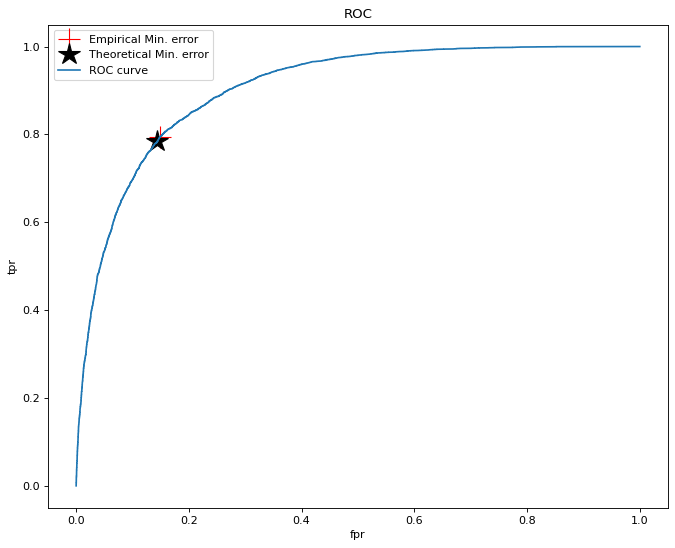

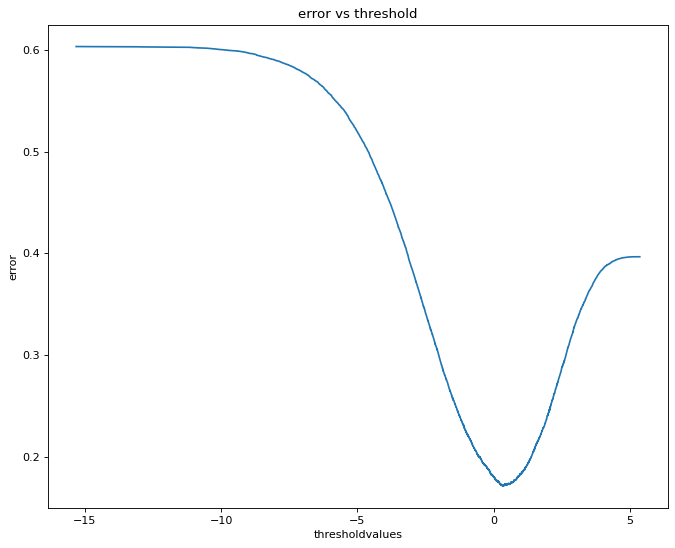

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: UserWarning: The following kwargs were not used by contour: 'level'


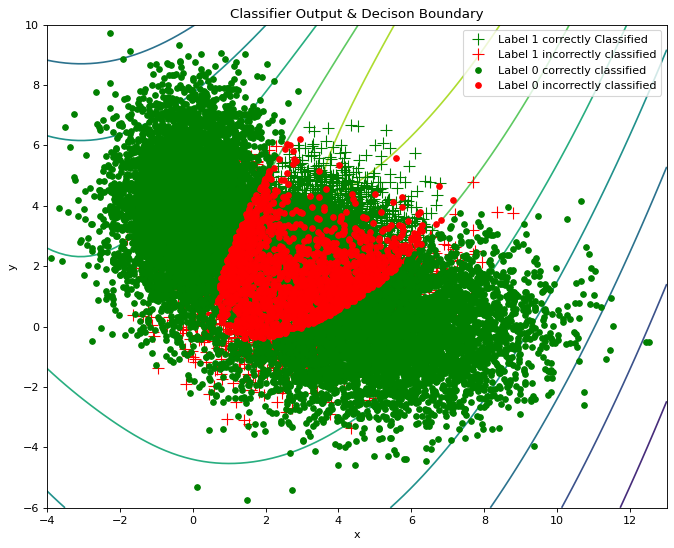

GMM mean for component 1 of class 0 : [ 5.04410276 -0.06180163]
GMM covariance for component 1 of class 0: [[3.49006214 0.03135547]
 [0.03135547 2.06151982]]
GMM mean for component 1 of class 0 : [-0.02958842  4.00720945]
GMM covariance for component 2 of class 0: [[ 0.95797913 -0.01661015]
 [-0.01661015  3.2452349 ]]
GMM prior for class 0 component 1 0.4724316935999749 component 2 0.5275683064000252
GMM mean for class 1 [3.00251703 2.12036674]
GMM covariance for class 1 [[ 2.00293048 -0.00367732]
 [-0.00367732  1.8179165 ]]
min error for theoretical threshold: 0.1725
log empirical threshold value for minnimum error: 0.3484794658790986
empirical minumum error: 0.1713
empirical min error aliter: 0.1713
threshold value with min error 4.124362438980139


In [83]:
estimateParametersAndPlotROC(data[1],data[3])

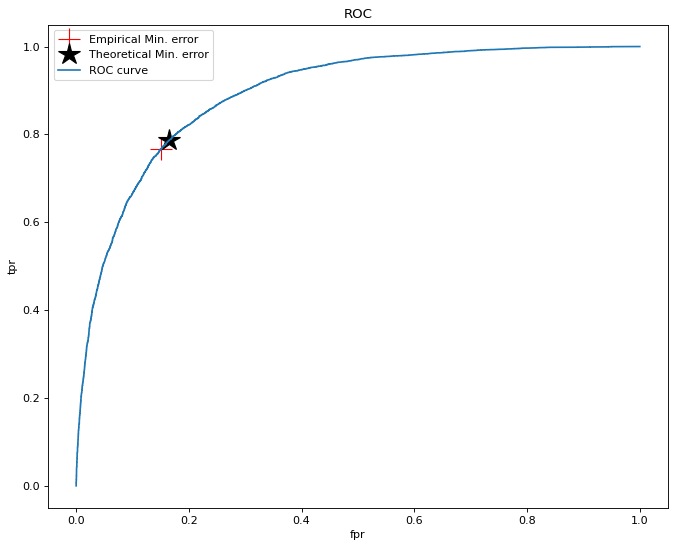

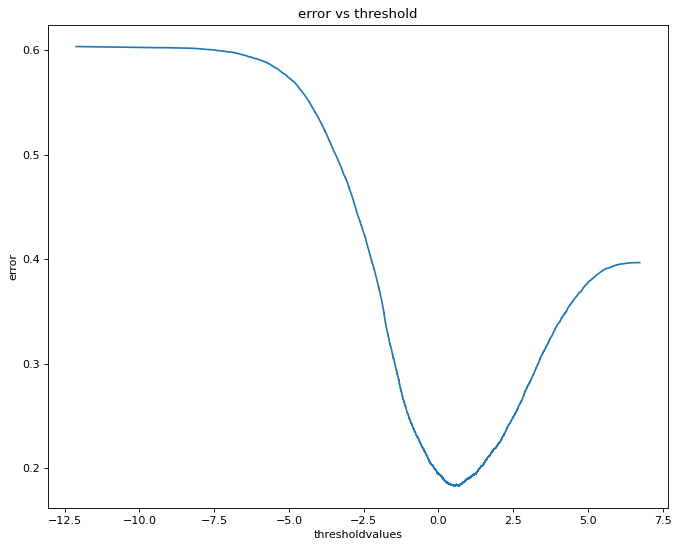

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: UserWarning: The following kwargs were not used by contour: 'level'


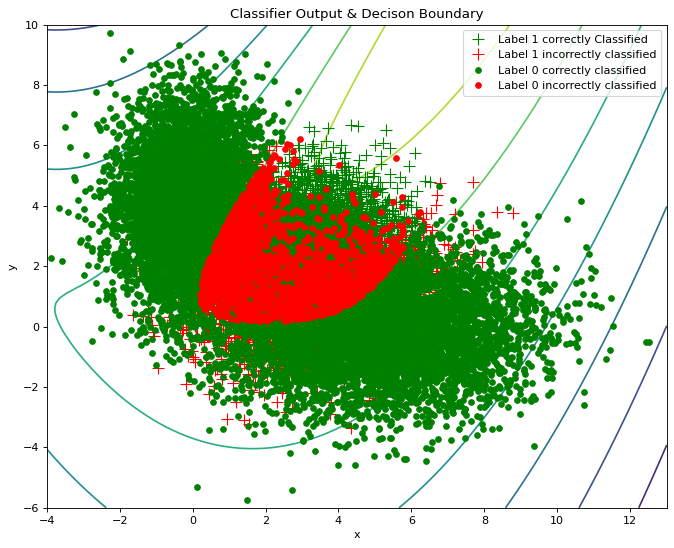

GMM mean for component 1 of class 0 : [ 4.35627929 -0.02571947]
GMM covariance for component 1 of class 0: [[4.94989112 1.53129375]
 [1.53129375 1.85308384]]
GMM mean for component 1 of class 0 : [-0.36781996  4.44410088]
GMM covariance for component 2 of class 0: [[1.06225821 0.07795906]
 [0.07795906 2.5453916 ]]
GMM prior for class 0 component 1 0.5473918946773604 component 2 0.45260810532263973
GMM mean for class 1 [2.90763919 2.01520061]
GMM covariance for class 1 [[ 2.01931613 -0.45663958]
 [-0.45663958  1.99570881]]
min error for theoretical threshold: 0.18415000000000004
log empirical threshold value for minnimum error: 0.5459271296630139
empirical minumum error: 0.18294999999999995
empirical min error aliter: 0.18295
threshold value with min error 5.619305385632001


In [84]:
estimateParametersAndPlotROC(data[0],data[3])

In [ ]:
df = data[2]
df=df.loc[df['label']==0]
df=df.drop(columns=['label'])
gm = GaussianMixture(n_components=2, random_state=0,n_init=5,init_params='random').fit(df.to_numpy())
print(gm.means_[0])
print(gm.means_[1])
print("covariance")
print(gm.covariances_[0])
print(gm.covariances_[1])

[2.48434755 2.00572866]
[2.43836428 2.02393753]
covariance
[[ 8.83493486 -5.01557565]
 [-5.01557565  6.53951467]]
[[ 8.69939462 -4.99763359]
 [-4.99763359  6.54549032]]


In [ ]:
df=data[2]
label=df['label']
df=df.drop(columns = ['label'])
dataset = df.to_numpy()
new_col = np.ones((dataset.shape[0],1))
dataset = np.append(new_col,dataset,1)
dataset.shape

(10000, 3)

In [ ]:
# Part C
def calCost(dataset,labels,w):
  sigmoid = 1/(1+np.exp(-1*np.dot(dataset,w)))
  cost = np.sum(-1*np.multiply(labels, np.log(sigmoid)) - 1*np.multiply((1-labels),np.log(1-sigmoid)),axis=0)
  return cost

In [ ]:
def train(df):
  labels=df['label'].to_numpy()
  df=df.drop(columns=['label'])
  dataset = df.to_numpy()
  new_col = np.ones((dataset.shape[0],1))
  dataset = np.append(new_col,dataset,1)
  w=np.zeros((dataset.shape[1],1))
  calCostOpt = partial(calCost, dataset,labels)
  output=minimize(calCostOpt,[w])
  w_opt= output.x
  return(w_opt)

In [ ]:
w_trained_10K = train(data[2])
w_trained_1K = train(data[1])
w_trained_100 = train(data[0])

In [ ]:
print(w_trained_100)
print(w_trained_1K)
print(w_trained_10K)

[-0.95063551  0.15707725  0.09168005]
[-1.08633462  0.16545248  0.11457372]
[-0.83811593  0.11505914  0.08339406]


In [ ]:
def implement_model(w_trained):
  df=data[3]
  labels=df['label']
  df=df.drop(columns=['label'])
  dataset = df.to_numpy()
  new_col = np.ones((dataset.shape[0],1))
  dataset = np.append(new_col,dataset,1)
  sigmoid = 1/(1+np.exp(-1*np.dot(dataset,w_trained)))
  decision = (sigmoid>0.5).astype(int)
  print(1 in decision)
  tp=0
  fp=0
  tn=0
  fn=0
  c1=[]
  ic1=[]
  c0=[]
  ic0=[]
  for i in range(decision.shape[0]):
    if(decision[i]==1 and labels[i]==1):
      tp+=1
      c1.append(i)
    elif(decision[i]==1 and labels[i]==0):
      fp+=1
      ic0.append(i)
    elif(decision[i]==0 and labels[i]==1):
      fn+=1
      ic1.append(i)
    elif(decision[i]==0 and labels[i]==0):
      tn+=1
      c0.append(i)
  assert(tp+fp+fn+tn==len(labels))
  #plot classification with decision boundary
  figure(figsize=(10, 8), dpi=80)
  plt.plot(df.x[c1],df.y[c1],'+',color='g',markersize = 10)
  plt.plot(df.x[ic1],df.y[ic1],'+',color='r',markersize = 10)
  plt.plot(df.x[c0],df.y[c0],'.',color='g',markersize = 10)
  plt.plot(df.x[ic0],df.y[ic0],'.',color='r',markersize = 10)
  horizontalGrid = np.linspace(np.floor(min(dataset[:,1])),np.ceil(max(dataset[:,1])),100)
  verticalGrid = np.linspace(np.floor(min(dataset[:,2])),np.ceil(max(dataset[:,2])),100);
  dsg = np.zeros((100,100))
  a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
  for i in range(100):
    for j in range(100):
      dsg[i][j] = np.dot(np.array([1,a[0][i][j],a[1][i][j]]),w_trained)
  plt.contour(a[0],a[1],dsg,levels=[0])
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Classifier Output & Decison Boundary')
  plt.legend(['Label 1 correctly Classified','Label 1 incorrectly classified', 'Label 0 correctly classified','Label 0 incorrectly classified'])
  plt.show()
  print('the accuracy on the validtion set is:{} '.format((tp+tn)/(tp+fp+fn+tn)))

True


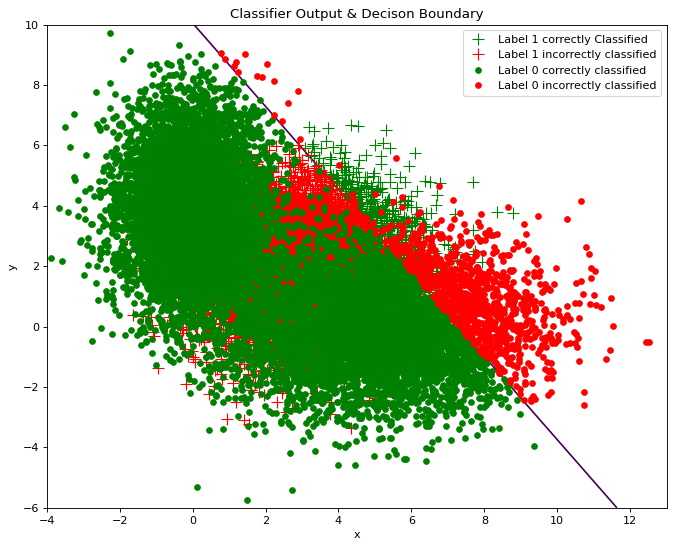

the accuracy on the validtion set is:0.5747 
True


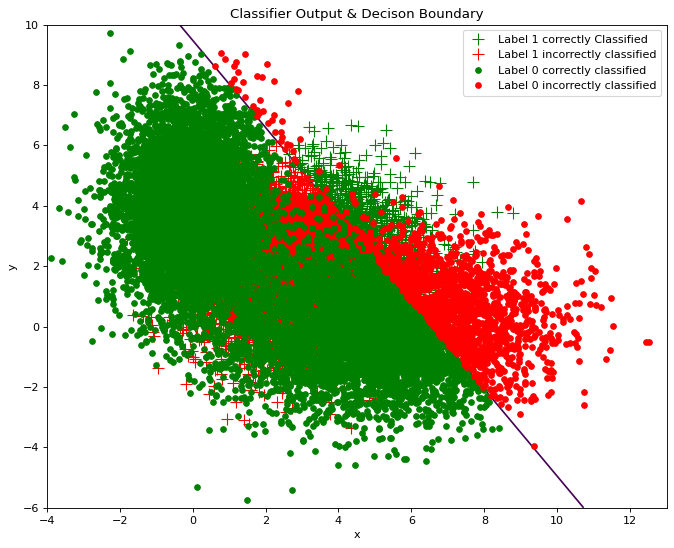

the accuracy on the validtion set is:0.5694 
True


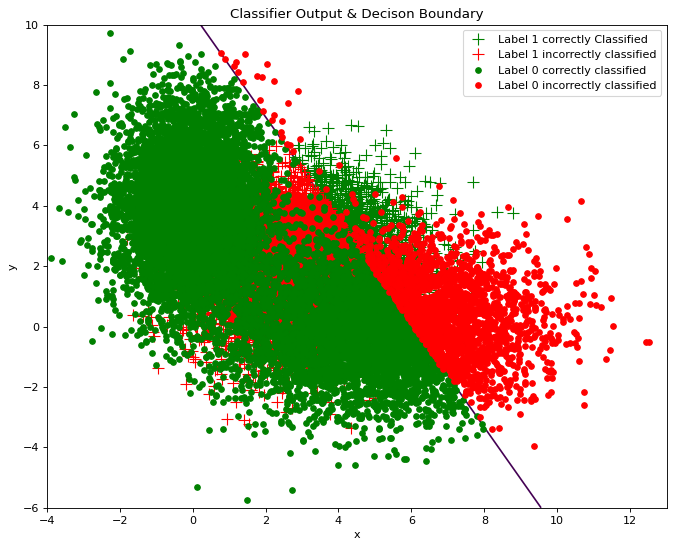

the accuracy on the validtion set is:0.55875 


In [ ]:
implement_model(w_trained_10K.reshape((3,1)))
implement_model(w_trained_1K.reshape((3,1)))
implement_model(w_trained_100.reshape((3,1)))

In [ ]:
def generateDataQuadratic():
  data_quadratic=[]
  for i in range(len(data)):
    df=data[i]
    df_add=df.copy()
    df_add['xsq'] = df['x']**2
    df_add['xy'] = df['x']*df['y']
    df_add['ysq'] = df['y']**2
    data_quadratic.append(df_add)
  return data_quadratic

In [ ]:
data_quadratic = generateDataQuadratic()
w_trained_10K_quadratic = train(data_quadratic[2])
w_trained_1K_quadratic = train(data_quadratic[1])
w_trained_100_quadratic = train(data_quadratic[0])
print(w_trained_100_quadratic)
print(w_trained_1K_quadratic)
print(w_trained_10K_quadratic)

[-3.35020816  2.92569514  0.99431443 -0.46928512  0.10081282 -0.26668955]
[-0.52590281  1.34686854 -0.10961508 -0.32744635  0.36457938 -0.1664983 ]
[-0.70179671  1.25394687 -0.1031127  -0.28653767  0.3398077  -0.14000334]


In [ ]:
def implement_model_quadratic(w_trained):
  df=data_quadratic[3]
  labels=df['label']
  df=df.drop(columns=['label'])
  dataset = df.to_numpy()
  new_col = np.ones((dataset.shape[0],1))
  dataset = np.append(new_col,dataset,1)
  sigmoid = 1/(1+np.exp(-1*np.dot(dataset,w_trained)))
  decision = (sigmoid>0.5).astype(int)
  print(1 in decision)
  tp=0
  fp=0
  tn=0
  fn=0
  c1=[]
  ic1=[]
  c0=[]
  ic0=[]
  for i in range(decision.shape[0]):
    if(decision[i]==1 and labels[i]==1):
      tp+=1
      c1.append(i)
    elif(decision[i]==1 and labels[i]==0):
      fp+=1
      ic0.append(i)
    elif(decision[i]==0 and labels[i]==1):
      fn+=1
      ic1.append(i)
    elif(decision[i]==0 and labels[i]==0):
      tn+=1
      c0.append(i)
  assert(tp+fp+fn+tn==len(labels))
  #plot classification with decision boundary
  figure(figsize=(10, 8), dpi=80)
  plt.plot(df.x[c1],df.y[c1],'+',color='g',markersize = 10)
  plt.plot(df.x[ic1],df.y[ic1],'+',color='r',markersize = 10)
  plt.plot(df.x[c0],df.y[c0],'.',color='g',markersize = 10)
  plt.plot(df.x[ic0],df.y[ic0],'.',color='r',markersize = 10)
  horizontalGrid = np.linspace(np.floor(min(dataset[:,1])),np.ceil(max(dataset[:,1])),100)
  verticalGrid = np.linspace(np.floor(min(dataset[:,2])),np.ceil(max(dataset[:,2])),100);
  dsg = np.zeros((100,100))
  a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
  for i in range(100):
    for j in range(100):
      dsg[i][j] = np.dot(np.array([1,a[0][i][j],a[1][i][j],a[0][i][j]**2,a[0][i][j]*a[1][i][j],a[1][i][j]**2]),w_trained)
  plt.contour(a[0],a[1],dsg,levels=[0])
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Classifier Output & Decison Boundary')
  plt.legend(['Label 1 correctly Classified','Label 1 incorrectly classified', 'Label 0 correctly classified','Label 0 incorrectly classified'])
  plt.show()
  print('the accuracy on the validtion set is:{} '.format((tp+tn)/(tp+fp+fn+tn)))

True


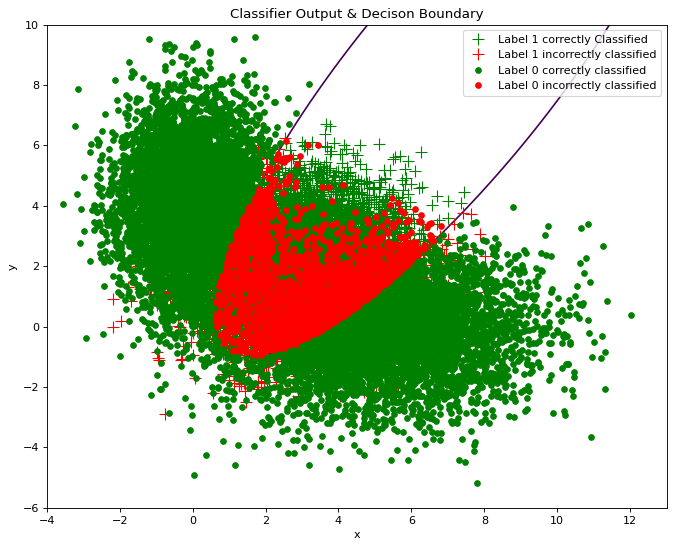

the accuracy on the validtion set is:0.8273 
True


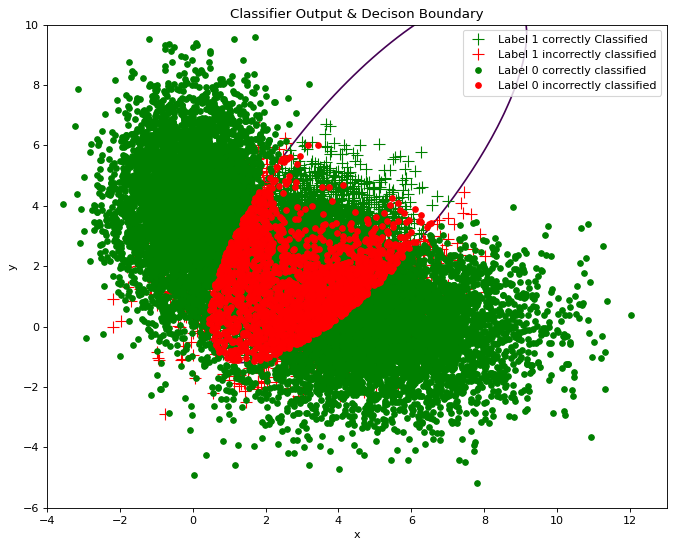

the accuracy on the validtion set is:0.827 
True


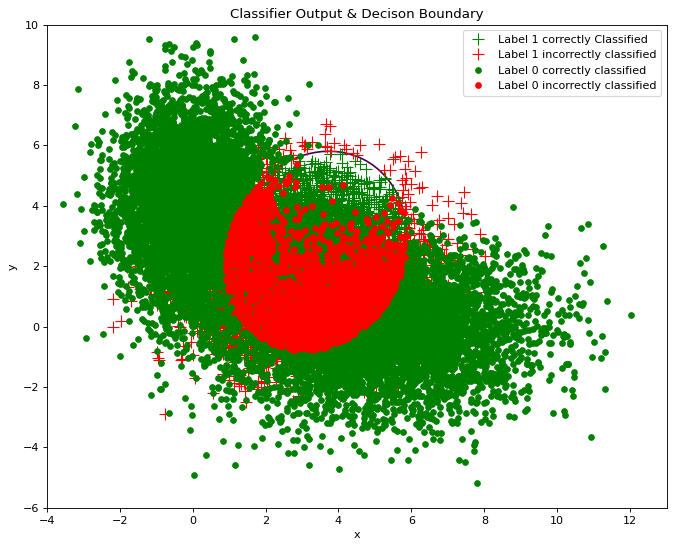

the accuracy on the validtion set is:0.8097 


In [ ]:
implement_model_quadratic(w_trained_10K_quadratic.reshape((6,1)))
implement_model_quadratic(w_trained_1K_quadratic.reshape((6,1)))
implement_model_quadratic(w_trained_100_quadratic.reshape((6,1)))

##Q2

In [ ]:
def getTruePoint():
  theta=np.random.uniform(low=0,high=2*(np.pi))
  x=np.cos(theta)
  y=np.sin(theta)
  return np.asarray((x,y)).reshape(2,1)

In [ ]:
# K markers
def calculateClassCondnPdf4K(x,y,truePosVector,ulimit):
  xtrue = truePosVector[0]
  ytrue = truePosVector[1]
  k1 = np.array((1,0)).reshape(2,1)
  k2 = np.array((-1,0)).reshape(2,1)
  k3 = np.array((0,1)).reshape(2,1)
  k4 = np.array((0,-1)).reshape(2,1)
  kPoints=[k1,k2,k3,k4]
  # compute distance measures
  distances=[]
  ranges=[]
  for i in range(ulimit):
    rangeX = xtrue-kPoints[i][0]
    rangeY = ytrue - kPoints[i][1]
    rangeMeasurement = np.array((rangeX,rangeY))
    rangeMeasurement = np.linalg.norm(rangeMeasurement)
    diffx=x-kPoints[i][0]
    diffy=y-kPoints[i][1]
    distance = np.array((diffx,diffy))
    distance = np.linalg.norm(distance)
    #distance = np.sqrt(diffx**2+diffy**2)
    distances.append(distance)
    noise = np.random.normal(0,0.3,1)
    while(rangeMeasurement+noise<=0):
      noise = np.random.normal(0,0.3,1)
    ranges.append(rangeMeasurement)
  ans = [((ranges[i]-distances[i])**2)/0.09 for i in range(len(ranges))]
  return sum(ans)

In [ ]:
#prior
def calcPriorAtPoint(x,y):
  #cov=np.array([[0.25, 0], [0, 0.25]])
  #mean=np.array([0,0])
  #X = np.array((x,y)).reshape(2,1)
  #X= np.concatenate((x.T,y),axis=1)
  #return multivariate_normal.pdf(x,mean,cov)
  return x**2/(0.25**2) + y**2/(0.25**2)

In [ ]:
# MAP calculation
def mapCalc(x,y,truePosVector,ulimit):
  return (calcPriorAtPoint(x,y) + calculateClassCondnPdf4K(x,y,truePosVector,ulimit))

#Aliter

In [ ]:
truePosVector=getTruePoint()

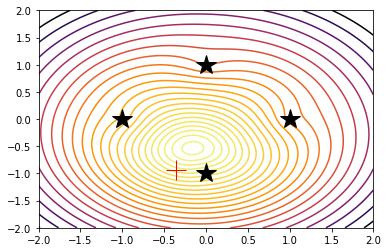

In [ ]:
CONTOUR_LEVELS = np.geomspace(0.0001, 250, 100)
gridpoints = np.array(np.meshgrid(np.linspace(-2, 2, 128), np.linspace(-2, 2, 128)))
dsg=np.zeros((128,128))
for i in range(128):
  for j in range(128):
    dsg[i][j] = mapCalc(gridpoints[0][i][j],gridpoints[1][i][j],truePosVector,4)
plt.plot(truePosVector[0],truePosVector[1],'+',color = 'red', markersize = 20)
plt.plot(1,0,'*',color='black',markersize=20)
plt.plot(-1,0,'*',color='black',markersize=20)
plt.plot(0,1,'*',color='black',markersize=20)
plt.plot(0,-1,'*',color='black',markersize=20)
plt.contour(gridpoints[0],gridpoints[1],dsg,cmap='inferno_r', levels=CONTOUR_LEVELS)
plt.show()

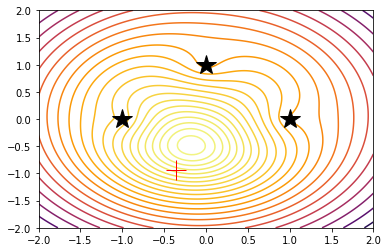

In [ ]:
gridpoints = np.array(np.meshgrid(np.linspace(-2, 2, 128), np.linspace(-2, 2, 128)))
dsg=np.zeros((128,128))
for i in range(128):
  for j in range(128):
    dsg[i][j] = mapCalc(gridpoints[0][i][j],gridpoints[1][i][j],truePosVector,3)
plt.plot()
plt.plot(truePosVector[0],truePosVector[1],'+',color = 'red', markersize = 20)
plt.plot(1,0,'*',color='black',markersize=20)
plt.plot(-1,0,'*',color='black',markersize=20)
plt.plot(0,1,'*',color='black',markersize=20)
plt.contour(gridpoints[0],gridpoints[1],dsg,cmap='inferno_r', levels=CONTOUR_LEVELS)
plt.show()

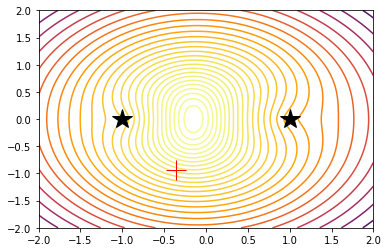

In [ ]:
gridpoints = np.array(np.meshgrid(np.linspace(-2, 2, 128), np.linspace(-2, 2, 128)))
dsg=np.zeros((128,128))
for i in range(128):
  for j in range(128):
    dsg[i][j] = mapCalc(gridpoints[0][i][j],gridpoints[1][i][j],truePosVector,2)
plt.plot()
plt.plot(truePosVector[0],truePosVector[1],'+',color = 'red', markersize = 20)
plt.plot(1,0,'*',color='black',markersize=20)
plt.plot(-1,0,'*',color='black',markersize=20)
plt.contour(gridpoints[0],gridpoints[1],dsg,cmap='inferno_r', levels=CONTOUR_LEVELS)
plt.show()

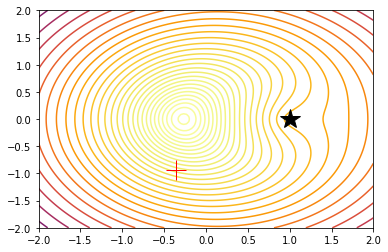

In [ ]:
gridpoints = np.array(np.meshgrid(np.linspace(-2, 2, 128), np.linspace(-2, 2, 128)))
dsg=np.zeros((128,128))
for i in range(128):
  for j in range(128):
    dsg[i][j] = mapCalc(gridpoints[0][i][j],gridpoints[1][i][j],truePosVector,1)
plt.plot()
plt.plot(truePosVector[0],truePosVector[1],'+',color = 'red', markersize = 20)
plt.plot(1,0,'*',color='black',markersize=20)
plt.contour(gridpoints[0],gridpoints[1],dsg,cmap='inferno_r', levels=CONTOUR_LEVELS)
plt.show()